In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from matplotlib import patches
from sklearn import metrics
import os
import sys
import itertools
from pathlib import Path
import pickle
import logging
import time
import prim
from Optimization_Methods.GlowWorm import GlowWorm

In [2]:
import logging
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG,)
logger = logging.getLogger(__name__)

In [3]:
with open('models/queries-uniform-1-multi_False-aggr-XGB-RMSE=0.26-R2=0.97.pkl', 'rb') as file:  
    m1 = pickle.load(file)
with open('models/queries-uniform-2-multi_False-aggr-XGB-RMSE=0.16-R2=0.96.pkl', 'rb') as file:  
    m2 = pickle.load(file)
with open('models/queries-uniform-3-multi_False-aggr-XGB-RMSE=0.09-R2=0.90.pkl', 'rb') as file:  
    m3 = pickle.load(file)
with open('models/queries-uniform-4-multi_False-aggr-XGB-RMSE=0.14-R2=0.45.pkl' , 'rb') as file:  
    m4 = pickle.load(file)
with open('models/queries-uniform-5-multi_False-density-XGB-RMSE=19.19-R2=0.99.pkl', 'rb') as file:  
    m5 = pickle.load(file)
                    

In [4]:
dimensions = [1,2,3,4,5]
glowworms = [100,200,300,400, 500]
iters = [100,200,300,400]

In [5]:

glowworm_approx_details = []
for k in range(5):
    for d in dimensions:
        for G in glowworms:
            if d==1:
                m=m1
            elif d==2:
                m=m2
            elif d==3:
                m=m3
            elif d==4:
                m=m4
            else:
                m=m5
            def objective_density(X):
                res = np.log(m.predict(X) - 1500) - 2.9*np.sum(np.log(1+X[:,X.shape[1]//2:]),axis=1)
                res[np.isnan(res)] = -np.inf
                return res
            #Generate queries
            start = time.time()
            gw = GlowWorm(objective_density, dimensions=2*d, nt=5, iter_max=100, glowworms=G, time_capture=True)
            gw.optimize()
            end = (time.time() - start)*1000 #convert to ms
            glowworm_approx_details.append([d, end, gw.SUM_TIME, G])

/home/fotis/.local/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in log
/home/fotis/dev_projects/data_vis/Year 3/Optimization_Methods/GlowWorm.py:16: RuntimeWarning: invalid value encountered in double_scalars
  return loss/sN


In [6]:
df = pd.DataFrame(glowworm_approx_details, columns=['dimensions', 'time', 'obj_time', 'glowworms'])

/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0 to DejaVu Sans ('/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 2.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 2.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.2 to DejaVu Sans ('/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 2.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBU

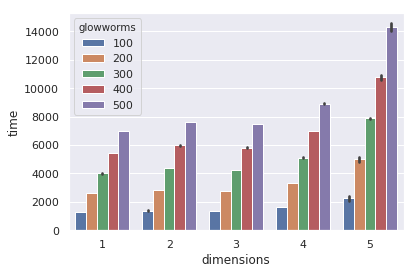

In [7]:
bar = sns.barplot(x='dimensions', y='time', hue='glowworms',data=df,)

/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: serif, font: Computer Modern Roman, info: ('cmr', '')
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: sans-serif, info: ('cmss', '')
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
DEBUG:matplotlib.texmanager:monospace font is not compatible with usetex.
DEBUG:matplotlib

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/dac6deda736edf5c427ec6f9a7b31ae2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/37a48b609a2e6d3f56a037776b4d08d1.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/6f04be40e71d28b0ece9e7a1e9379622.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontcon

DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/350173a3242bc258fce34f318fdab645.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/920f6025f4f3200916e71d56461ab129.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/fotis/.cache/matplotlib/tex.cache/233caebda627069bc73a0d13612f8ee1.tex']
DEBUG:matplotlib.texmanager:b"This is pdfTeX, Version 3.14159265-2.6-1.40.16 (TeX Live 2015/Debian) (preloaded format=latex)\n restricted \\write18 enabled.\nent

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:['dvipng', '-bg', 'Transparent', '-D', '72', '-T', 'tight', '-o', '/home/fotis/.cache/matplotlib/tex.cache/83239e0199a7f20e296e080637745b23.png', '/home/fotis/.cache/matplotlib/tex.cache/6c372a36cb854c84c85a147d1cb6164f.dvi']
DEBUG:matplotlib.texmanager:b'This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson\n[1] \n'
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/6c372a36cb854c84c85a147d1cb6164f.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa5

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/37a48b609a2e6d3f56a037776b4d08d1.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/6f04be40e71d28b0ece9e7a1e9379622.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/bab4cfaf8535d02e9365a2d663049008.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: 

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/9ee25ef26d3c3e34afbde3bcc0e38f00.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/a941dd34f165f1e9634c932e5c14eac2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/6851772da016ae1be3c6f3e5247eeb4a.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home

DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/65f83ddfa0825fc33d0d080b9c3427bb.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/59d3bb976bd0cd847bb4d1f73c59eb73.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/59d3bb976bd0cd847bb4d1f73c59eb73.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home

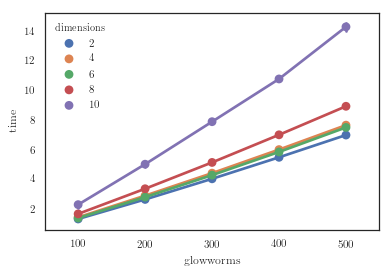

In [60]:
sns.pointplot(x='glowworms', y='time', hue='dimensions',data=df)

In [8]:
glowworm_approx_details_iters = []
for k in range(5):
    for d in dimensions:
        for i in iters:
            if d==1:
                m=m1
            elif d==2:
                m=m2
            elif d==3:
                m=m3
            elif d==4:
                m=m4
            else:
                m=m5
            def objective_density(X):
                res = np.log(m.predict(X) - 1500) - 2.9*np.sum(np.log(1+X[:,X.shape[1]//2:]),axis=1)
                res[np.isnan(res)] = -np.inf
                return res
            #Generate queries
            start = time.time()
            gw = GlowWorm(objective_density, dimensions=2*d, nt=5, iter_max=i, glowworms=100, time_capture=True)
            gw.optimize()
            end = (time.time() - start)*1000 #convert to ms
            glowworm_approx_details_iters.append([d, end, gw.SUM_TIME, i])

/home/fotis/.local/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in log


In [9]:
df_iters = pd.DataFrame(glowworm_approx_details_iters, columns=['dimensions', 'time', 'obj_time', 'iterations'])

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


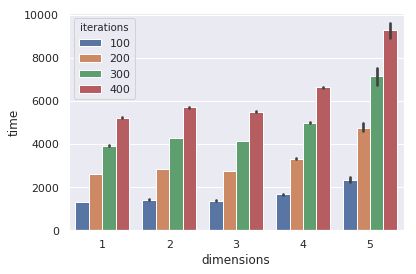

In [10]:
sns.barplot(x='dimensions', y='time', hue='iterations',data=df_iters,)

/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: serif, font: Computer Modern Roman, info: ('cmr', '')
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: sans-serif, info: ('cmss', '')
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
DEBUG:matplotlib.texmanager:monospace font is not compatible with usetex.
DEBUG:matplotlib

DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/6aa2a80852969443f367b6e2c8dc0338.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:['dvipng', '-bg', 'Transparent', '-D', '72', '-T', 'tight', '-o', '/home/fotis/.cache/matplotlib/tex.cache/ee85dfbd19b92a1266fed3699396f42b.png', '/home/fotis/.cache/matplotlib/tex.cache/6aa2a80852969443f367b6e2c8dc0338.dvi']
DEBUG:matplotlib.texmanager:b'This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson\n[1] \n'
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/6aa2a808529694

DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/233caebda627069bc73a0d13612f8ee1.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/0093ee738864f754c3b64989cebc46f3.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/7a8a1a211572a744fe31a0ac52f66969.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.axes._base:update_

DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
DEBUG:matplotlib.texmanager:monospace font is not compatible with usetex.
DEBUG:matplotlib.texmanager:monospace font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: monospace, font: Computer Modern Typewriter, info: ('cmtt', '')
DEBUG:matplotlib.texmanager:following keys changed: ['text.latex.preamble', 'text.latex.unicode', 'text.latex.preview', 'font.family', 'font.serif', 'font.sans-serif', 'font.cursive', 'font.monospace']
DEBUG:matplotlib.texmanager:text.latex.preamble : None       -> ['\\usepackage{gensymb}']
DEBUG:matplotlib.texmanager:text.latex.unicode  : None       -> True      
DEBUG:matplotlib.texmanager:text.latex.preview  : None       -> False     
DEBUG:matplotlib.texmanager:font.family         : None      

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/829467a3fd7b6aa1a6e335946d8899b7.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/dac6deda736edf5c427ec6f9a7b31ae2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/m

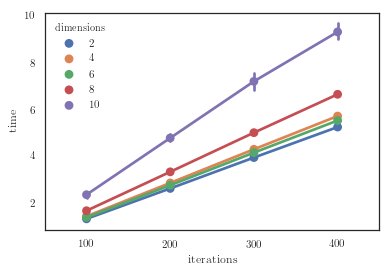

In [62]:
sns.pointplot(x='iterations', y='time', hue='dimensions',data=df_iters)

In [11]:
plt.style.use('seaborn-ticks')
plt.rc('text', usetex=True)
font_size=22
params = {'backend': 'ps',
          'text.latex.preamble': ['\\usepackage{gensymb}'],
          'text.usetex': True,
          'font.family': 'serif'
}

plt.rcParams.update(params)

In [13]:
df['time'] = df['time']/1000
df_iters['time'] = df_iters['time']/1000

In [55]:
df['dimensions']*=2
df_iters['dimensions']*=2

/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: serif, font: Computer Modern Roman, info: ('cmr', '')
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: sans-serif, info: ('cmss', '')
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
DEBUG:matplotlib.texmanager:monospace font is not compatible with usetex.
DEBUG:matplotlib.texmanager:monospace font is not compatible 

DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/01799479365f85d6650acdaa0e1bfdae.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/fotis/.cache/matplotlib/tex.cache/49a92fe421bc5063733ddb03a0e3e21a.tex']
DEBUG:matplotlib.texmanager:b"This is pdfTeX, Version 3.14159265-2.6-1.40.16 (TeX Live 2015/Debian) (preloaded format=latex)\n restricted \\write18 enabled.\nentering extended mode\n(/home/fotis/.cache/matplotlib/tex.cache/49a92fe421bc5063733ddb03a0e3e21a.tex\nLaTeX2e <2016/02/01>\nBabel <3.9q> and hyphenation patterns for 81 language(s) loaded.\n(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls\nDocument Class: article 2014/09/29 v1.4h Sta

DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: serif, font: Computer Modern Roman, info: ('cmr', '')
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: sans-serif, info: ('cmss', '')
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
DEBUG:matplotlib.texmanager:monospace font is not compatible with usetex.
DEBUG:matplotlib.texmanager:monospace font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: monospace, font: Comp

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/13dfa2deb03f1caa903632fd3b172939.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/13dfa2deb03f1caa903632fd3b172939.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F2' = b'cmr17' (dvi)
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8a5c34cb08cc73292460ed5ebe1b30c2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered spe

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/806ba1b6afc9ad097cae05218826dfc8.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8a5c34cb08cc73292460ed5ebe1b30c2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8a5c34cb08cc73292460ed5ebe1b30c2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontcon

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8a5c34cb08cc73292460ed5ebe1b30c2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8a5c34cb08cc73292460ed5ebe1b30c2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/7eeb7da0669c49f980214acd44ff4167.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/633f461682e8ced71c2d169d1ad8a814.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/d5b36263c33c02e057e78e6d458e5a19.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/d5b36263c33c02e057e78e6d458e5a19.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home

DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8a5c34cb08cc73292460ed5ebe1b30c2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/7eeb7da0669c49f980214acd44ff4167.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.backends.backend_pdf:Embedding Type-1 font b'cmr12' from dvi.
DEBUG:matplotlib.backends.backend_pdf:Embedding TeX font b'cmr12' - fontinfo={'effects': {}, 'fontfile': '/usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr12.pfb', 'dvifont': <matplotlib.dviread.DviFont object at 0x7f547cf73728>, 'pdfname': <Name b'F1'>, 'encodingfile': None, 'basefont': b'CMR12'}
DEBUG:matplotlib.backends.backend_pdf:Embedding Type-1 font b'cmr17' from dvi.
DEBUG:matplotlib.backends.backend_pdf:

DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/7a7ccaed2ab6e3977cf5498b25780ced.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/c9f95f2f3d356b874e7d0d9236fbbaae.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/806ba1b6afc9ad097cae05218826dfc8.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontcon

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/806ba1b6afc9ad097cae05218826dfc8.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/7eeb7da0669c49f980214acd44ff4167.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/c95f64b1e070b9f0b1688583ec3b214a.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/01799479365f85d6650acdaa0e1bfdae.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/49a92fe421bc5063733ddb03a0e3e21a.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: 

DEBUG:matplotlib.texmanager:font.cursive        : None       -> ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'cursive']
DEBUG:matplotlib.texmanager:font.monospace      : None       -> ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
DEBUG:matplotlib.texmanager:RE-INIT
old fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: serif, font: Computer Modern Roman, info: ('cmr', '')
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not co

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/633f461682e8ced71c2d169d1ad8a814.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/633f461682e8ced71c2d169d1ad8a814.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/7faadbe7ca824c1b5f7aa6981c0f5812.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: 

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/2cbad7cfeaac47ac71d80e3257114a40.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/7ccfc527510126ac8a2f1f8470f4090a.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcm

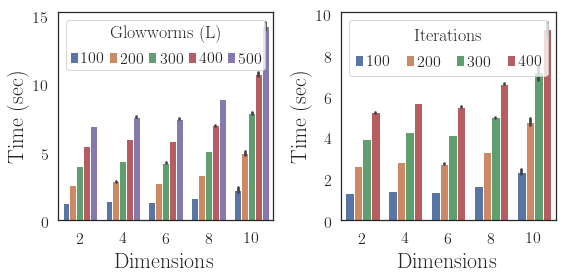

In [56]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
bar = sns.barplot(x='dimensions', y='time', hue='glowworms',data=df,ax=ax1)
ax1.set_xlabel('Dimensions', fontsize=font_size)
ax1.set_ylabel('Time (sec)', fontsize=font_size)
plt.tick_params(which='both', labelsize=16)
plt.legend(prop={'size': 16} ,frameon=True, loc='best', title='Glowworms (L)', title_fontsize=18,ncol=5,mode='expand', handlelength=.5,handletextpad=.2,borderpad=.2)
ax2 = fig.add_subplot(122)
sns.barplot(x='dimensions', y='time', hue='iterations',data=df_iters,ax=ax2)
ax2.set_xlabel('Dimensions', fontsize=font_size)
ax2.set_ylabel('Time (sec)', fontsize=font_size)
plt.legend(prop={'size': 16} ,frameon=True, loc='best', title='Iterations', title_fontsize=18,ncol=5,mode='expand', handlelength=.5,handletextpad=.2,columnspacing=.1)
plt.tick_params(which='both', labelsize=16)
plt.tight_layout()
plt.savefig('output/sensitivity/glowworms-performance.pdf',format='pdf', dpi=300)

In [ ]:
from codebase.Accuracy import AccuracyRunnerApprox

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
result_details = []
#Load models and run experiments
directory = os.fsencode('models')
for glows in glowworms:
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if not filename.startswith('queries'):
            continue;
        logger.debug(filename)
        a = filename.split('-')
        dims = int(a[2])
        multi = a[3].split('_')[1]=="True"
        aggr = a[4]
        m = None

        with open('models/%s' % filename, 'rb') as file:  
            m = pickle.load(file)

        ac = AccuracyRunnerApprox(dims,multi, aggr,m, glows)
        proposed = ac.run_test()
        iou_metric, avg_min_dist = ac.check_accuracy(proposed)
        expectedj = np.mean(ac.get_j())
    #     r2 =  float(a[7].split('=')[1][:4])
    #     print(a[7].split('=')[1][:4])
        rmse =  float(a[6].split('=')[1])
        model_name = a[5]
        result_details.append([dims,multi,aggr,model_name, rmse, iou_metric ,avg_min_dist, glows, expectedj])

In [ ]:
result_details_df = pd.DataFrame(result_details, columns=['Dimensions', 'Multiple', 'Aggregate', 'Model', 'RMSE','IOU','avg_min_dist','glowworms','expected_j'])

In [ ]:
result_details_df.to_csv('output/sensitivity/glowworms-sensitivity.csv')

In [ ]:
filtered = result_details_df[(result_details_df['Model']=='XGB') & (result_details_df['Aggregate']=='density')]

In [ ]:
filtered

In [ ]:
g = sns.FacetGrid(filtered, col="Dimensions",  row="Multiple")
g = g.map(plt.plot, "glowworms", 'expected_j')

In [ ]:
g = sns.FacetGrid(filtered, col="Dimensions",  row="Multiple")
g = g.map(plt.scatter, "IOU", 'expected_j')

In [ ]:
sns.regplot(x='expected_j',y='IOU', data= result_details_df)

In [ ]:
iters_result_details = []
#Load models and run experiments
directory = os.fsencode('models')
for i in iters:
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if not filename.startswith('queries'):
            continue;
        logger.debug(filename)
        a = filename.split('-')
        dims = int(a[2])
        multi = a[3].split('_')[1]=="True"
        aggr = a[4]
        m = None

        with open('models/%s' % filename, 'rb') as file:  
            m = pickle.load(file)

        ac = AccuracyRunnerApprox(dims,multi, aggr,m, iters=i)
        proposed = ac.run_test()
        iou_metric, avg_min_dist = ac.check_accuracy(proposed)
        expectedj = np.mean(ac.get_j())
    #     r2 =  float(a[7].split('=')[1][:4])
    #     print(a[7].split('=')[1][:4])
        rmse =  float(a[6].split('=')[1])
        model_name = a[5]
        iters_result_details.append([dims,multi,aggr,model_name, rmse, iou_metric ,avg_min_dist, i, expectedj])

In [ ]:
iters_details_df = pd.DataFrame(iters_result_details, columns=['Dimensions', 'Multiple', 'Aggregate', 'Model', 'RMSE','IOU','avg_min_dist','iterations','expected_j'])

In [ ]:
filtered_iters = iters_details_df[(iters_details_df['Model']=='XGB') & (iters_details_df['Aggregate']=='density')]

In [ ]:
g = sns.FacetGrid(filtered_iters, col="Dimensions",  row="Multiple")
g = g.map(plt.plot, "iterations", 'expected_j')

In [ ]:
result_details_dimensionality = []
#Load models and run experiments
directory = os.fsencode('models')
for glows in 50*4**np.arange(5):
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if (not filename.startswith('queries')) or ('XGB' not in filename) or ('density' not in filename):
            continue;
        logger.debug(filename)
        a = filename.split('-')
        dims = int(a[2])
        multi = a[3].split('_')[1]=="True"
        aggr = a[4]
        m = None

        with open('models/%s' % filename, 'rb') as file:  
            m = pickle.load(file)

        ac = AccuracyRunnerApprox(dims,multi, aggr,m, glows)
        proposed = ac.run_test()
        iou_metric, avg_min_dist = ac.check_accuracy(proposed)
        expectedj = np.mean(ac.get_j())
    #     r2 =  float(a[7].split('=')[1][:4])
    #     print(a[7].split('=')[1][:4])
        rmse =  float(a[6].split('=')[1])
        model_name = a[5]
        result_details_dimensionality.append([dims,multi,aggr,model_name, rmse, iou_metric ,avg_min_dist, glows, expectedj])

In [ ]:
result_details_dimensionality_df = pd.DataFrame(result_details_dimensionality, columns=['Dimensions', 'Multiple','Aggregate', 'Model Name', 'RMSE', 'IOU', 'Avg_min_dist','Glowworms', 'ExpectedJ'])

In [ ]:
result_details_dimensionality_df.to_csv('output/sensitivity/glowworms-iou-number.csv')

In [ ]:
sns.regplot(x='Glowworms',y='ExpectedJ', data=result_details_dimensionality_df)